# Escuela Politécnica Nacional  
## Métodos Numéricos  
### Taller 1b: Eliminación Gaussiana vs Gauss-Jordan  

### Jhonn Saeteros  


[06-24 21:57:12][INFO] Inicio: 2025-06-24 21:57:12.474019
[06-24 21:57:12][INFO] Iniciando comparación de métodos...
[06-24 21:57:12][INFO] Gauss - Tiempo: 0.0000s, Operaciones: 1
[06-24 21:57:12][INFO] Jordan - Tiempo: 0.0000s, Operaciones: 2
[06-24 21:57:12][INFO] Completado n =   1 | Gauss: 0.0016s | Jordan: 0.0040s
[06-24 21:57:12][INFO] Gauss - Tiempo: 0.0017s, Operaciones: 226
[06-24 21:57:12][INFO] Jordan - Tiempo: 0.0000s, Operaciones: 297
[06-24 21:57:12][INFO] Completado n =   6 | Gauss: 0.0017s | Jordan: 0.0050s
[06-24 21:57:12][INFO] Gauss - Tiempo: 0.0000s, Operaciones: 1176
[06-24 21:57:12][INFO] Jordan - Tiempo: 0.0000s, Operaciones: 1617
[06-24 21:57:12][INFO] Completado n =  11 | Gauss: 0.0040s | Jordan: 0.0043s
[06-24 21:57:12][INFO] Gauss - Tiempo: 0.0042s, Operaciones: 3351
[06-24 21:57:12][INFO] Jordan - Tiempo: 0.0020s, Operaciones: 4712
[06-24 21:57:12][INFO] Completado n =  16 | Gauss: 0.0059s | Jordan: 0.0020s
[06-24 21:57:12][INFO] Gauss - Tiempo: 0.0038s, Ope

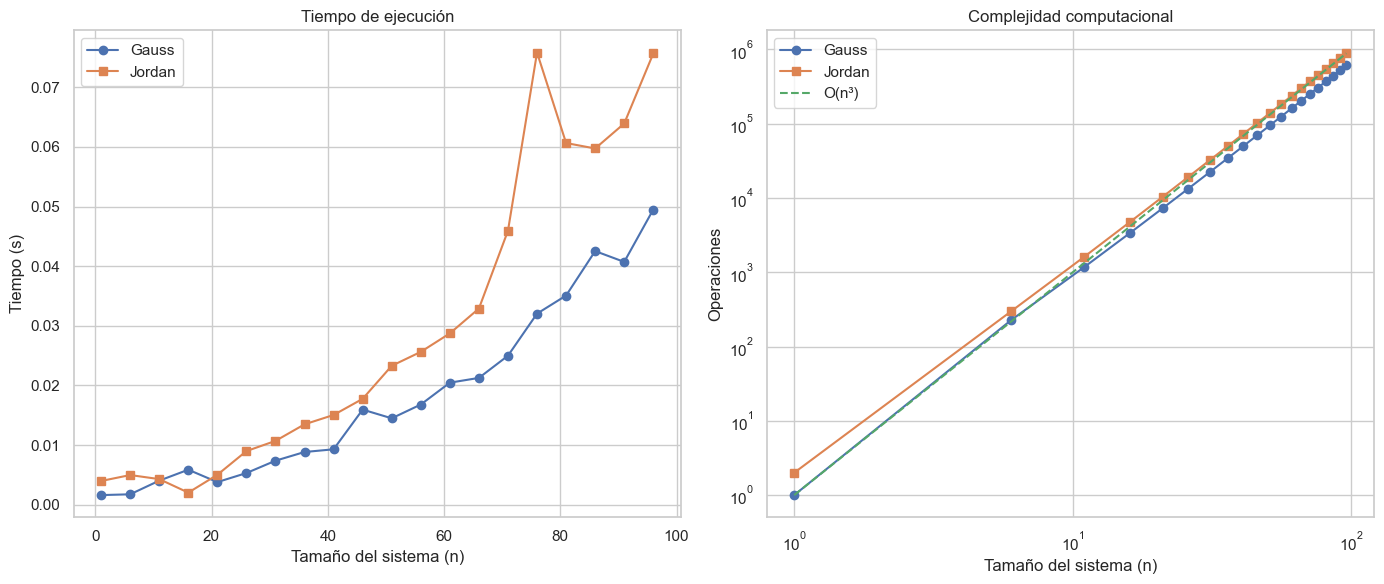

![Resultado](comparacion_metodos.png)

[06-24 21:57:18][INFO] Finalizado: 2025-06-24 21:57:18.731523


In [1]:
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from typing import Tuple
from sys import stdout
from datetime import datetime
from IPython.display import display, Markdown

# Configuración de logging
logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logger = logging.getLogger()
logger.info(f"Inicio: {datetime.now()}")

def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Crea la matriz aumentada [A|b]."""
    return np.column_stack((A, b))

def eliminacion_gaussiana(A: np.ndarray) -> Tuple[np.ndarray, int]:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana."""
    start_time = time.time()
    operaciones = 0
    if not isinstance(A, np.ndarray):
        logger.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)

    n = A.shape[0]
    assert A.shape[1] == n + 1, "La matriz debe ser de tamaño n x (n+1)."

    for i in range(n - 1):
        max_row = i + np.argmax(np.abs(A[i:, i]))
        if A[max_row, i] == 0:
            raise ValueError("No existe solución única.")
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]

        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            operaciones += 1
            A[j, i:] -= m * A[i, i:]
            operaciones += 2 * (n + 1 - i)

    if A[n-1, n-1] == 0:
        raise ValueError("No existe solución única.")

    x = np.zeros(n)
    x[n-1] = A[n-1, n] / A[n-1, n-1]
    operaciones += 1

    for i in range(n-2, -1, -1):
        x[i] = (A[i, n] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]
        operaciones += 2 * (n - i)

    logger.info(f"Gauss - Tiempo: {time.time()-start_time:.4f}s, Operaciones: {operaciones}")
    return x, operaciones

def gauss_jordan(Ab: np.ndarray) -> Tuple[np.ndarray, int]:
    """Resuelve un sistema de ecuaciones lineales mediante el método de Gauss-Jordan."""
    start_time = time.time()
    operaciones = 0
    Ab = np.array(Ab, dtype=float)
    n = Ab.shape[0]
    assert Ab.shape[1] == n + 1, "La matriz debe ser de tamaño n x (n+1)."

    for i in range(n):
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if Ab[max_row, i] == 0:
            raise ValueError("No existe solución única.")
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        pivot = Ab[i, i]
        Ab[i] /= pivot
        operaciones += n + 1 - i

        for j in range(n):
            if j != i:
                factor = Ab[j, i]
                Ab[j] -= factor * Ab[i]
                operaciones += 2 * (n + 1 - i)

    logger.info(f"Jordan - Tiempo: {time.time()-start_time:.4f}s, Operaciones: {operaciones}")
    return Ab[:, -1], operaciones

def comparar_metodos(n_max: int = 100, step: int = 5) -> Tuple[dict, dict]:
    resultados_gauss = {'n': [], 'tiempo': [], 'operaciones': []}
    resultados_jordan = {'n': [], 'tiempo': [], 'operaciones': []}

    for n in range(1, n_max + 1, step):
        A = np.random.rand(n, n) + n * np.eye(n)
        b = np.random.rand(n)
        Ab = matriz_aumentada(A, b)

        try:
            start = time.time()
            _, ops = eliminacion_gaussiana(Ab.copy())
            resultados_gauss['n'].append(n)
            resultados_gauss['tiempo'].append(time.time() - start)
            resultados_gauss['operaciones'].append(ops)

            start = time.time()
            _, ops = gauss_jordan(Ab.copy())
            resultados_jordan['n'].append(n)
            resultados_jordan['tiempo'].append(time.time() - start)
            resultados_jordan['operaciones'].append(ops)

            logger.info(f"Completado n = {n:3d} | Gauss: {resultados_gauss['tiempo'][-1]:.4f}s | Jordan: {resultados_jordan['tiempo'][-1]:.4f}s")
        except Exception as e:
            logger.error(f"Error con n={n}: {str(e)}")
            break

    return resultados_gauss, resultados_jordan

def graficar_resultados(resultados_gauss: dict, resultados_jordan: dict):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].plot(resultados_gauss['n'], resultados_gauss['tiempo'], 'o-', label='Gauss')
    axes[0].plot(resultados_jordan['n'], resultados_jordan['tiempo'], 's-', label='Jordan')
    axes[0].set_xlabel('Tamaño del sistema (n)')
    axes[0].set_ylabel('Tiempo (s)')
    axes[0].set_title('Tiempo de ejecución')
    axes[0].legend()
    axes[0].grid(True)

    n_vals = np.array(resultados_gauss['n'])
    axes[1].loglog(resultados_gauss['n'], resultados_gauss['operaciones'], 'o-', label='Gauss')
    axes[1].loglog(resultados_jordan['n'], resultados_jordan['operaciones'], 's-', label='Jordan')
    axes[1].loglog(n_vals, n_vals**3, '--', label='O(n³)')
    axes[1].set_xlabel('Tamaño del sistema (n)')
    axes[1].set_ylabel('Operaciones')
    axes[1].set_title('Complejidad computacional')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.savefig("comparacion_metodos.png", dpi=300)
    plt.show()
    display(Markdown("![Resultado](comparacion_metodos.png)"))

if __name__ == "__main__":
    np.random.seed(42)
    logger.info("Iniciando comparación de métodos...")
    resultados_gauss, resultados_jordan = comparar_metodos(n_max=100, step=5)
    logger.info("Generando gráficos...")
    graficar_resultados(resultados_gauss, resultados_jordan)
    logger.info(f"Finalizado: {datetime.now()}")